In [121]:
import pandas as pd
import os
from os import path
# Setting where our data is sitting
data_folder = path.join(
    path.abspath('..'),  # '..' means the directory above this one
    'data')
data_folder

'C:\\Users\\tdavies\\Desktop\\Data_Science\\CORE\\03-simple-predictions\\data'

In [122]:
raw_postcodes = \
    pd.read_csv(path.join(data_folder, 'australian_postcodes.csv')) \
      .dropna(how='any')

# We have to remove duplicate records (there's one for each suburb) so we aggregate them up
postcodes = pd.DataFrame.from_records([
        (postcode, df.long.mean(), df.lat.mean(), ', '.join(df.locality))
        for postcode, df in raw_postcodes.groupby('postcode')
    ],
    columns=('postcode', 'longitude', 'latitude', 'locality'),
    index='postcode'
)
postcodes.head()


,longitude,latitude,locality
postcode,,,
200,149.117136,-35.277272,AUSTRALIAN NATIONAL UNIVERSITY
800,130.955789,-12.801028,DARWIN
801,130.955789,-12.801028,DARWIN
804,130.843310,-12.432181,PARAP
810,130.873472,-12.376967,"ALAWA, BRINKIN, CASUARINA, JINGILI, LEE POINT,..."


In [123]:
faults_data = \
    pd.read_csv(path.join(data_folder, 'faults.csv')) \
      .dropna(how='any')

# rename columns
new_names = {
    'City': 'suburb',
    'Notif.Date': 'date',
    'PriorityType': 'type',
    'Pipe Material': 'material',
    'Pipe Size': 'size',
    'Notification': 'notif',
}
faults_data.rename(columns=new_names, inplace=True)
faults_data.head()

,notif,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,Priority,Priority Code,Description.1,User status,System status,Cause code text,suburb,Malfunct. start,Malfunct.end,Location
8,301297459,23/05/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,1,SF1,BROKEN MAIN,INI OBLD,ATCO NOCO ORAS,3rd Party Intervention,SPENCER PARK,23/05/2013,23/05/2013,AL
9,301453151,10/07/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,1,SF1,BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,SPENCER PARK,10/07/2014,10/07/2014,AL
10,301506040,07/11/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00453028,...,1,SF1,M6WA324050 BROKEN MAIN,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,MOUNT CLARENCE,07/11/2014,07/11/2014,AL
11,301335630,28/08/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00479319,...,1,SF1,BROKEN MAIN,REIS,ATCO NOCO NOPT ORAS,3rd Party Intervention,YAKAMIA,28/08/2013,28/08/2013,AL
12,301267394,28/02/2013,2013,MNDAMAGE,BROK,MNCAUSE,ATCO,MNOBJECT,PIPE,00504762,...,1,SF1,PIP BKN MAIN - PAT DURING (ATCOGAS),REIS,ATCO NOCO NOPT ORAS,ATCO Operator,MIDDLETON BEACH,28/02/2013,28/02/2013,AL


In [ ]:
#faults_data = fault_data.join(postcodes, how='inner')
fault_data = pd.merge(faults_data, postcodes, left_on='suburb', right_on='locality', how='left')
#faults_data.join(postcodes.set_index('City'), on='locality')
#faults_data['suburb']

In [125]:
fault_data.head()

,notif,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,Description.1,User status,System status,Cause code text,suburb,Malfunct. start,Malfunct.end,Location,longitude,latitude
0,301297459,23/05/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,BROKEN MAIN,INI OBLD,ATCO NOCO ORAS,3rd Party Intervention,SPENCER PARK,23/05/2013,23/05/2013,AL,NaN,NaN
1,301453151,10/07/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,SPENCER PARK,10/07/2014,10/07/2014,AL,NaN,NaN
2,301506040,07/11/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00453028,...,M6WA324050 BROKEN MAIN,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,MOUNT CLARENCE,07/11/2014,07/11/2014,AL,NaN,NaN
3,301335630,28/08/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00479319,...,BROKEN MAIN,REIS,ATCO NOCO NOPT ORAS,3rd Party Intervention,YAKAMIA,28/08/2013,28/08/2013,AL,NaN,NaN
4,301267394,28/02/2013,2013,MNDAMAGE,BROK,MNCAUSE,ATCO,MNOBJECT,PIPE,00504762,...,PIP BKN MAIN - PAT DURING (ATCOGAS),REIS,ATCO NOCO NOPT ORAS,ATCO Operator,MIDDLETON BEACH,28/02/2013,28/02/2013,AL,NaN,NaN


In [80]:
#fault_data=fault_data.fillna(0)

In [126]:
fault_data

,notif,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,Description.1,User status,System status,Cause code text,suburb,Malfunct. start,Malfunct.end,Location,longitude,latitude
0,301297459,23/05/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,BROKEN MAIN,INI OBLD,ATCO NOCO ORAS,3rd Party Intervention,SPENCER PARK,23/05/2013,23/05/2013,AL,NaN,NaN
1,301453151,10/07/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,SPENCER PARK,10/07/2014,10/07/2014,AL,NaN,NaN
2,301506040,07/11/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00453028,...,M6WA324050 BROKEN MAIN,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,MOUNT CLARENCE,07/11/2014,07/11/2014,AL,NaN,NaN
3,301335630,28/08/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00479319,...,BROKEN MAIN,REIS,ATCO NOCO NOPT ORAS,3rd Party Intervention,YAKAMIA,28/08/2013,28/08/2013,AL,NaN,NaN
4,301267394,28/02/2013,2013,MNDAMAGE,BROK,MNCAUSE,ATCO,MNOBJECT,PIPE,00504762,...,PIP BKN MAIN - PAT DURING (ATCOGAS),REIS,ATCO NOCO NOPT ORAS,ATCO Operator,MIDDLETON BEACH,28/02/2013,28/02/2013,AL,NaN,NaN
5,301267796,01/03/2013,2013,MNDAMAGE,BROK,MNCAUSE,ATCO,MNOBJECT,PIPE,00504762,...,PIP BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,ATCO Operator,MIDDLETON BEACH,01/03/2013,01/03/2013,AL,NaN,NaN
6,300927685,23/04/2010,2010,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00520226,...,BROKEN MAIN - PETER 0437208804,INI OBLD NORD,ATCO NOCO NOPT,3rd Party Intervention,SPENCER PARK,23/04/2010,23/04/2010,AL,NaN,NaN
7,301422743,30/04/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00590344,...,BROKEN MAIN - 63 PE,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,MOUNT CLARENCE,30/04/2014,30/04/2014,AL,NaN,NaN
8,301443106,17/06/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00815528,...,BROKEN MAIN,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,YAKAMIA,17/06/2014,17/06/2014,AL,NaN,NaN
9,301296680,21/05/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00842107,...,BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,MIRA MAR,21/05/2013,21/05/2013,AL,NaN,NaN


In [127]:
# Splits from longitude
split_points = [
    ('longitude', 110, [False, True])  
]

In [128]:
import numpy as np
import seaborn as sns

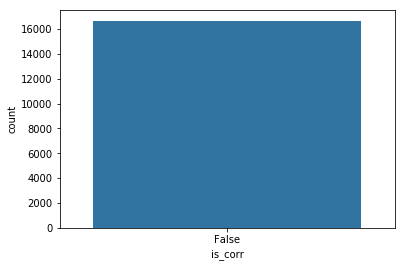

In [129]:
fault_data['is_corr'] = np.vstack([
    pd.cut(fault_data[longitude], bins=[0, split, 200], labels=is_corr)
    for longitude, split, is_corr in split_points
]).sum(axis=0) == 4
sns.countplot('is_corr', data=fault_data)

In [130]:
fault_data['is_corr']

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
16627    False
16628    False
16629    False
16630    False
16631    False
16632    False
16633    False
16634    False
16635    False
16636    False
16637    False
16638    False
16639    False
16640    False
16641    False
16642    False
16643    False
16644    False
16645    False
16646    False
16647    False
16648    False
16649    False
16650    False
16651    False
16652    False
16653    False
16654    False
16655    False
16656    False
Name: is_corr, Length: 16657, dtype: bool

In [ ]:
sns.pairplot(fault_data.iloc[::5], hue='is_corr', plot_kws={'alpha': 0.5})

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_We

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: unsupported operand type(s) for /: 'str' and 'float'

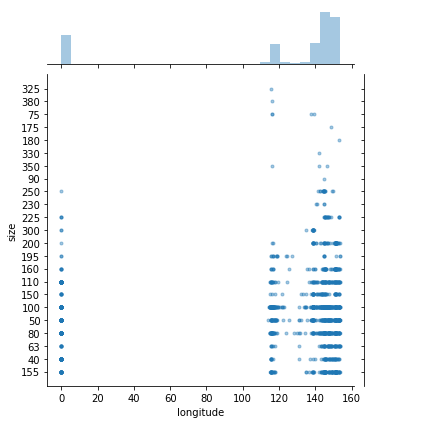

In [85]:
sns.jointplot('longitude', 'size', fault_data, joint_kws={'alpha': 0.4, 'marker': '.'})

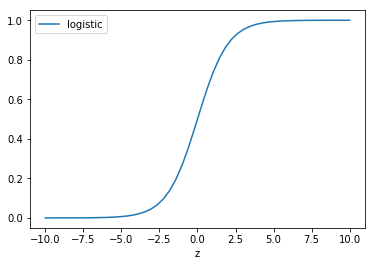

In [86]:
def logistic(z):    
    return 1 / (1 + np.exp(-z))

zs = np.linspace(-10, 10)
logistic_data = pd.DataFrame( 
    {'z': zs, 'logistic': logistic(zs)}
)
logistic_data.plot('z', 'logistic')

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


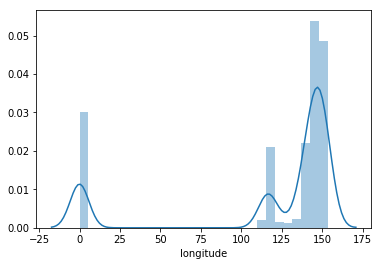

In [87]:
sns.distplot(fault_data['longitude'])

In [88]:
from sklearn import preprocessing, pipeline, linear_model

# Make up our pipeline where we transform the longitude first to make it more gaussian!
regressor = pipeline.Pipeline([
    ('transform', preprocessing.FunctionTransformer(np.log, validate=True)),
    ('model', linear_model.LogisticRegression())
])

In [89]:
X = fault_data[['longitude']]
y = fault_data['is_corr']

In [90]:
X

,longitude
200,149.117136
804,130.843310
810,130.873472
830,131.538018
835,131.029221
841,130.955789
850,132.262021
861,134.252508
862,134.828446
872,131.907703


In [91]:
regressor.fit(X, y)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: divide by zero encountered in log
  **(kw_args if kw_args else {}))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predict_df = pd.DataFrame(
    {'test_longitude_values': [110, 120, 130, 140, 150]} # Are these values in elevated corrosion zone or not?
)  
regressor.predict(predict_df)

In [ ]:
model = regressor.named_steps.model
model.intercept_, model.coef_

In [ ]:
def logistic(regressor, X):
    """
    Plot our logistic model given input values x
    
    We're doing this so that we can see the output of the logistic function - normally
    you'd just do `regressor.predict(x)` to get actual 1, 0 labels for your data.
    
    Parameters:
        regressor - a fitted logistic regression pipeline
        x - the values to evaulate the function at
    """
    # We can pull the model and transforms from our pipeline
    model = regressor.named_steps.model
    tf = regressor.named_steps.transform
    
    # Next we replay the steps in the pipeline to make a prediction
    z = model.intercept_ + model.coef_[0][0] * tf.transform(X)
    return 1 / (1 + np.exp(-z)).ravel()

In [ ]:
logistic(regressor, predict_df)

In [ ]:
f, ax = plt.subplots(1, 1)

# Some longitude values to predict from
longs = pd.DataFrame(
    {'test_longitude_values': np.linspace(0.1, 3)}
)

# An offset to stop everything plotting on top of everything else
offset = 0.02

# shows predictions given contents
predictions = regressor.predict(longs)
ax.plot(longs, predictions + offset, '.', alpha=0.7, label='predicted (+ offset)')  

# shows measured values plus jitter
jitter = np.random.normal(scale=0.01, size=len(fault_data))
ax.plot(fault_data['longitude'], fault_data['is_corr'] + jitter - offset, '.', alpha=0.1, label='measured (+ jitter - offset)')

# shows logistic function fitted from regressor
ax.plot(longs, logistic(regressor, longs), '--', label='fitted logistic function')

# Generate the logistic curve showing the location of 
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.set_title('Logistic regression with scikit-learn')
f.tight_layout()
#plot below: where y axis = 0.5 move across to logistic function. this shows hte cut off between is_ore and not is_ore.